In [1]:
import pandas as pd
import numpy as np
import json
import pandas as pd
import re
from rdkit import Chem
from rdkit.Chem import AllChem
from collections import Counter,defaultdict
from ast import literal_eval
import cobra
from cobra import Metabolite,Reaction,Gene
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
sys.path.append('../retrosynthesis/')

import sys
from common import *
# from check_newinfo_getyeast8U import *

In [2]:
### input
yeast870_path =  '../../Data/model/Yeast-MetaTwin.yml'
yeast8U_path = '../../Data/model/Yeast-MetaTwin-lipid.yml'
sce_gene_clean_ec = '../../Results/ECnumber_prediction/Saccharomyces_cerevisiae_teacher_maxsep.csv'
DeepEC_path = '../../Results/ECnumber_prediction/Sce_DeepECv2.txt'

### output
figs13_path = '../../Results/Figures/figs13.pdf'


In [3]:
yeast8 = cobra.io.load_yaml_model(yeast870_path)
yeast8.summary()

yeast8U = cobra.io.load_yaml_model(yeast8U_path)
# yeast8U.summary()

## gene frequency

# lipids only look at the reaction of lipids

In [4]:
yeast8U_gene_frequece_dict = {}
gene_lst = []
for rea in yeast8U.reactions:
    if 'rxnl' in rea.id:    #####################################################################################################################
        tmp = str(rea.gpr).replace(')','').replace('(','').replace(' and ',' ').replace(' or ',' ').split(' ')
        gene_lst += tmp
gene_lst = [x for x in gene_lst if x!='']
print(len(set(gene_lst)))
yeast8U_gene_frequece_dict = list_to_frequency_dict(gene_lst)
yeast8U_gene_frequece_dict

yeast8_gene_frequece_dict = {}
gene_lst = []
for rea in yeast8.reactions:
    tmp = str(rea.gpr).replace(')','').replace('(','').replace(' and ',' ').replace(' or ',' ').split(' ')
    gene_lst += tmp
gene_lst = [x for x in gene_lst if x!='']
print(len(set(gene_lst)))
yeast8_gene_frequece_dict = list_to_frequency_dict(gene_lst)
yeast8_gene_frequece_dict

1383
2056


{'YDL174C': 2,
 'YEL039C': 8,
 'YJR048W': 8,
 'YEL071W': 169,
 'YDL178W': 169,
 'YAL060W': 85,
 'YML054C': 2,
 'YPR165W': 5,
 'YLR342W': 111,
 'YGR032W': 111,
 'YMR306W': 111,
 'YGR143W': 62,
 'YPR159W': 62,
 'YIL020C': 18,
 'YHR037W': 65,
 'YEL038W': 81,
 'YMR009W': 4,
 'YOL066C': 6,
 'YBR153W': 84,
 'YCL009C': 42,
 'YMR108W': 44,
 'YNL256W': 56,
 'YER152C': 551,
 'YGL202W': 555,
 'YJL060W': 554,
 'YHR063C': 84,
 'YDR035W': 54,
 'YBR249C': 54,
 'YDR204W': 555,
 'YGR255C': 171,
 'YLR201C': 555,
 'YML110C': 71,
 'YOL096C': 71,
 'YOR125C': 11,
 'YGL009C': 57,
 'YNL104C': 2,
 'YOR108W': 1,
 'YHR208W': 554,
 'YJR148W': 554,
 'YHR137W': 555,
 'YDR234W': 57,
 'YPR001W': 2,
 'YOL064C': 81,
 'YGL248W': 88,
 'YOR360C': 92,
 'YDR487C': 5,
 'YDR127W': 17,
 'YBR265W': 84,
 'YPL252C': 5,
 'YDR376W': 2,
 'YDR538W': 54,
 'YDR539W': 39,
 'YLR231C': 7,
 'YKR009C': 168,
 'YJR025C': 4,
 'YER175C': 68,
 'YCL018W': 84,
 'YGR087C': 46,
 'YLR044C': 46,
 'YLR134W': 46,
 'YBR176W': 5,
 'YDL080C': 40,
 'YNR033W

In [5]:
len(yeast8U_gene_frequece_dict)

1383

## gene2ec

In [6]:
clean_gene2ec_dict = get_gene2ec_dict_clean(sce_gene_clean_ec)
clean_ec2gene_dict = get_ec2gene_dict_clean(clean_gene2ec_dict)
print(clean_ec2gene_dict.keys())
print(len(clean_ec2gene_dict))

dict_keys(['5.3.99', '2.3.2', '3.1.2', '2.3.1', '1.12.99', '5.6.2', '3.2.2', '4.2.3', '1.14.15', '2.7.6', '3.5.1', '3.6.4', '3.4.21', '2.1.1', '7.1.2', '2.7.4', '3.4.13', '3.4.22', '3.1.3', '2.4.1', '3.1.1', '3.4.16', '3.2.1', '1.11.1', '3.4.24', '2.7.1', '1.6.5', '3.1.13', '3.1.12', '2.7.7', '7.1.1', '3.1.4', '3.6.1', '4.4.1', '5.2.1', '2.7.11', '2.7.10', '4.6.1', '5.3.4', '4.2.2', '3.4.11', '1.16.3', '3.6.5', '2.7.13', '3.4.19', '3.1.26', '5.4.99', '1.10.3', '7.6.2', '4.1.3', '3.1.21', '2.4.2', '2.7.8', '4.2.1', '6.2.1', '2.5.1', '1.14.99', '5.6.1', '1.13.12', '1.3.7', '6.1.1', '1.8.3', '1.3.99', '1.1.1', '1.14.13', '1.2.1', '1.14.14', '1.2.4', '1.4.4', '7.2.1', '1.4.1', '3.1.11', '2.1.3', '1.11.2', '3.4.23', '3.4.14', '1.7.5', '4.5.1', '4.1.1', '1.17.5', '1.3.1', '1.5.5', '5.1.3', '6.3.4', '1.16.1', '6.3.2', '3.4.25', '3.3.2', '1.8.1', '1.97.1', '4.1.2', '5.5.1', '2.7.12', '1.4.3', '1.14.16', '4.99.1', '1.8.4', '1.3.5', '1.15.1', '2.6.1', '1.1.99', '6.3.1', '1.23.5', '6.4.1', '2.3.3

In [7]:
DeepEC_gene2ec_dict = get_gene2ec_dict_DeepEC(DeepEC_path)
DeepEC_ec2gene_dict = get_ec2gene_dict_DeepEC(DeepEC_gene2ec_dict)
print(DeepEC_ec2gene_dict.keys())
print(len(DeepEC_ec2gene_dict))

dict_keys(['2.7.11', '3.1.2', '2.7.1', '2.4.1', '3.6.5', '3.1.21', '3.4.19', '2.7.9', '7.1.2', '2.7.4', '1.8.1', '2.7.7', '3.2.1', '1.11.1', '2.3.2', '1.3.1', '1.10.2', '3.6.1', '3.1.3', '3.4.11', '3.6.4', '1.14.11', '3.1.26', '3.4.21', '3.1.22', '3.1.4', '4.2.1', '6.2.1', '2.1.1', '6.1.1', '1.16.1', '3.4.22', '1.14.13', '1.2.1', '7.6.2', '1.4.4', '2.7.8', '3.6.3', '2.3.1', '1.4.1', '1.6.5', '5.2.1', '1.8.3', '6.3.2', '2.7.10', '2.4.99', '3.5.1', '3.5.2', '2.4.2', '4.1.3', '3.4.14', '2.5.1', '4.1.1', '1.5.5', '1.1.1', '5.1.3', '2.7.6', '1.3.5', '2.6.1', '6.3.1', '6.4.1', '2.3.3', '5.99.1', '3.1.1', '3.3.1', '4.2.3', '4.6.1', '1.8.4', '1.1.2', '2.2.1', '1.15.1', '2.7.2', '1.10.3', '3.1.11', '6.5.1', '5.4.2', '3.5.4', '3.4.25', '4.2.99', '3.4.24', '4.2.2', '1.2.98', '2.7.13', '3.1.13', '4.4.1', '1.17.4', '1.17.1', '5.6.2', '6.3.5', '5.5.1', '1.6.99', '3.5.3', '6.3.4', '2.7.12', '5.1.1', '1.14.14', '3.4.23', '5.3.4', '5.3.1', '3.3.2', '2.8.1', '1.1.5', '1.1.3', '4.3.3', '1.2.4', '1.3.3', 

In [8]:
yeast8U_ec_frequency_dict = process_reactions_to_ec_frequency(yeast8U.reactions, clean_gene2ec_dict)

# Process reactions for yeast8
yeast8_ec_frequency_dict = process_reactions_to_ec_frequency(yeast8.reactions, clean_gene2ec_dict)

yeast8U_yeast8_ec_frequency = {'EC':[],
                               'yeast8':[],
                               'yeast8U':[]}
for k,v in yeast8U_ec_frequency_dict.items():
    yeast8U_yeast8_ec_frequency['EC'].append(k)
    yeast8U_yeast8_ec_frequency['yeast8U'].append(v)
    if k in yeast8_ec_frequency_dict.keys():
        yeast8U_yeast8_ec_frequency['yeast8'].append(yeast8_ec_frequency_dict[k])
    else:
        yeast8U_yeast8_ec_frequency['yeast8'].append(0)

yeast8U_yeast8_ec_frequency_df = pd.DataFrame(yeast8U_yeast8_ec_frequency)
yeast8U_yeast8_ec_frequency_df['ratio'] = yeast8U_yeast8_ec_frequency_df.apply(
    lambda row: row['yeast8U'] / row['yeast8'] if row['yeast8'] != 0 else 0,
    axis=1
)
yeast8U_yeast8_ec_frequency_df.head(10)

,EC,yeast8,yeast8U,ratio
0,1.3.1,203,18147,89.394089
1,1.1.1,451,17102,37.920177
2,1.8.99,620,2476,3.993548
3,1.1.99,433,1938,4.475751
4,1.97.1,258,1763,6.833333
5,1.14.19,9,1541,171.222222
6,1.14.13,391,984,2.516624
7,1.14.11,385,977,2.537662
8,1.11.2,266,830,3.120301
9,1.11.1,233,817,3.506438


In [9]:
def get_ec_rank(ec,yeast8U_yeast8_ec_frequency_df):
    tmp_df = yeast8U_yeast8_ec_frequency_df[yeast8U_yeast8_ec_frequency_df['EC'].apply(lambda x:x.split('.')[0]== ec.split('.')[0])]
    tmp = tmp_df.reset_index()
    tmp = tmp[tmp['EC']==ec]
    return (tmp.index[0]+1)/len(tmp_df)

ec = '7.5.2'
get_ec_rank(ec,yeast8U_yeast8_ec_frequency_df)

0.5714285714285714

In [10]:
yeast8U_yeast8_ec_frequency_df.shape

(154, 4)

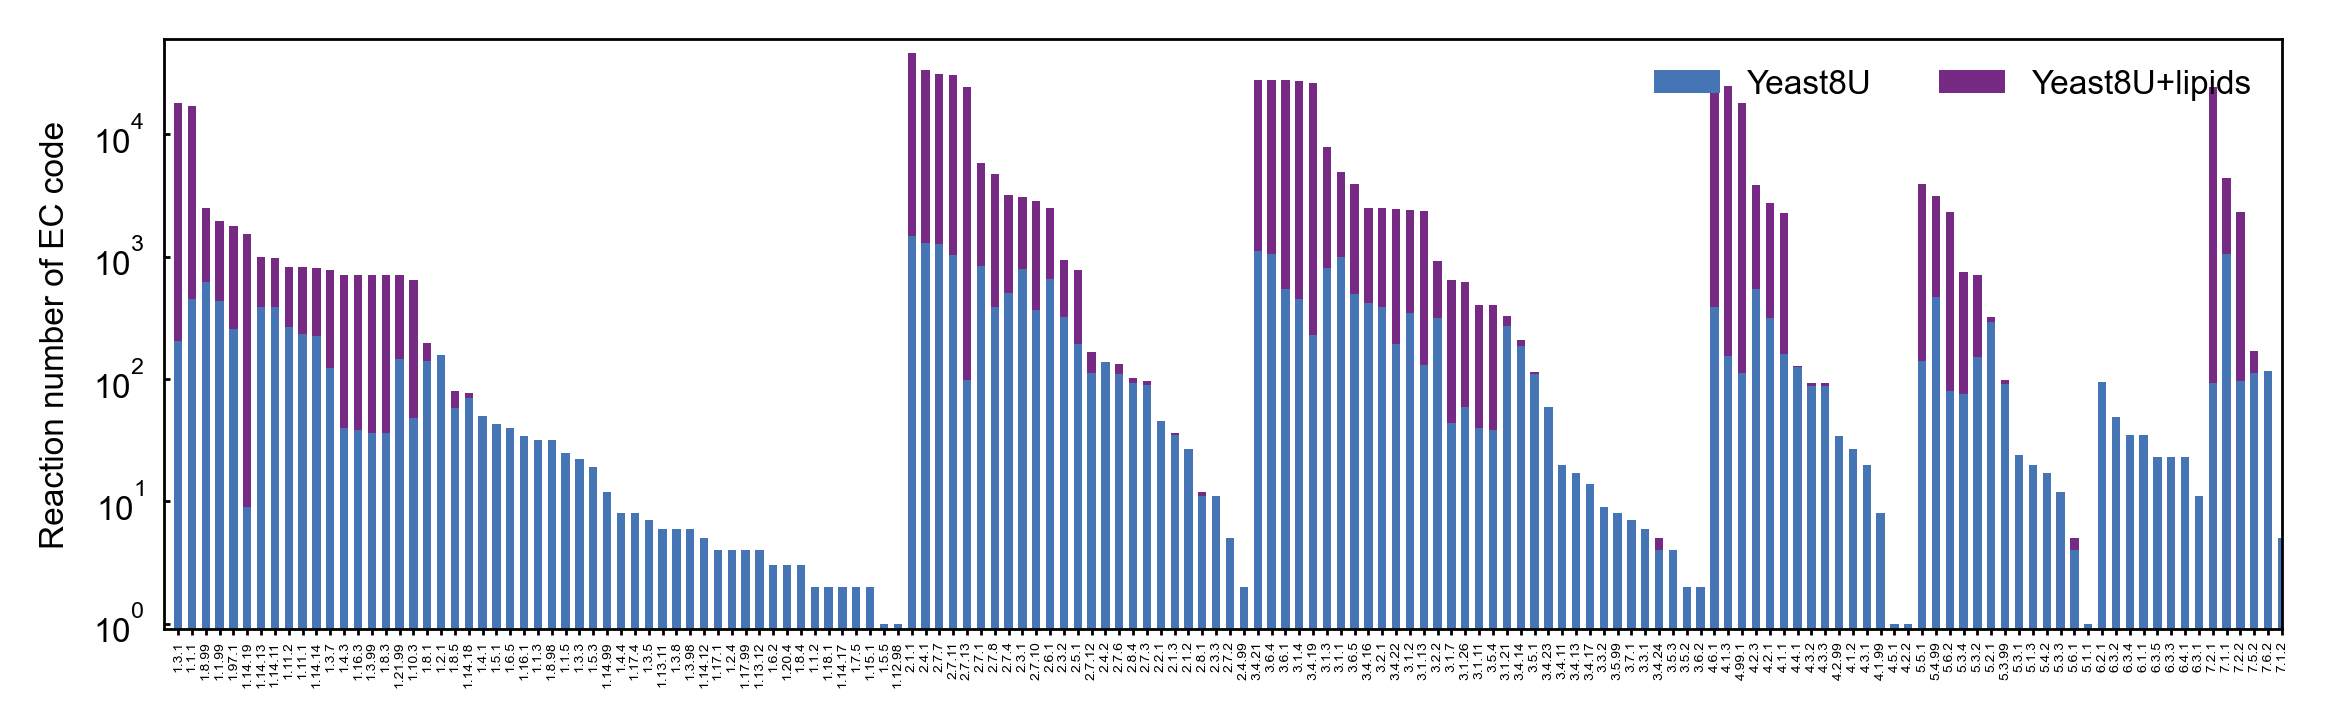

In [11]:
# Set general parameters
plt.figure(figsize=(5.8, 1.8), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'

# Set axis style
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

# Draw stacked bar chart
bar_width = 0.6
index = np.arange(len(yeast8U_yeast8_ec_frequency_df['EC']))
plt.bar(index, yeast8U_yeast8_ec_frequency_df['yeast8'], width=bar_width, label='Yeast8U', color='#4575b4')
plt.bar(index, yeast8U_yeast8_ec_frequency_df['yeast8U'] - yeast8U_yeast8_ec_frequency_df['yeast8'], width=bar_width, label='Yeast8U+lipids', color='#762a83', 
        bottom=yeast8U_yeast8_ec_frequency_df['yeast8'])

# Set x-axis labels
plt.xticks(index, yeast8U_yeast8_ec_frequency_df['EC'], fontsize=2.5, rotation=90)  # Set x-axis labels and rotation
plt.yticks(fontsize=6)  # Set y-axis labels

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', which='both', width=0.5, length=1, pad=1)  # Do not show x-axis tick lines, but keep labels

plt.xlim(-1, 152)
plt.ylim(0.9, 60000)  # Adjust y-axis range
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.minorticks_off()  # Hide minor ticks

plt.ylabel('Reaction number of EC code', fontsize=6)  # Adjust label

# Set legend
plt.legend(frameon=False, fontsize=6, loc='upper right', ncol=2)

# Show plot
plt.tight_layout()
# plt.savefig(figs13_path, dpi=400, bbox_inches='tight')                         
plt.show()

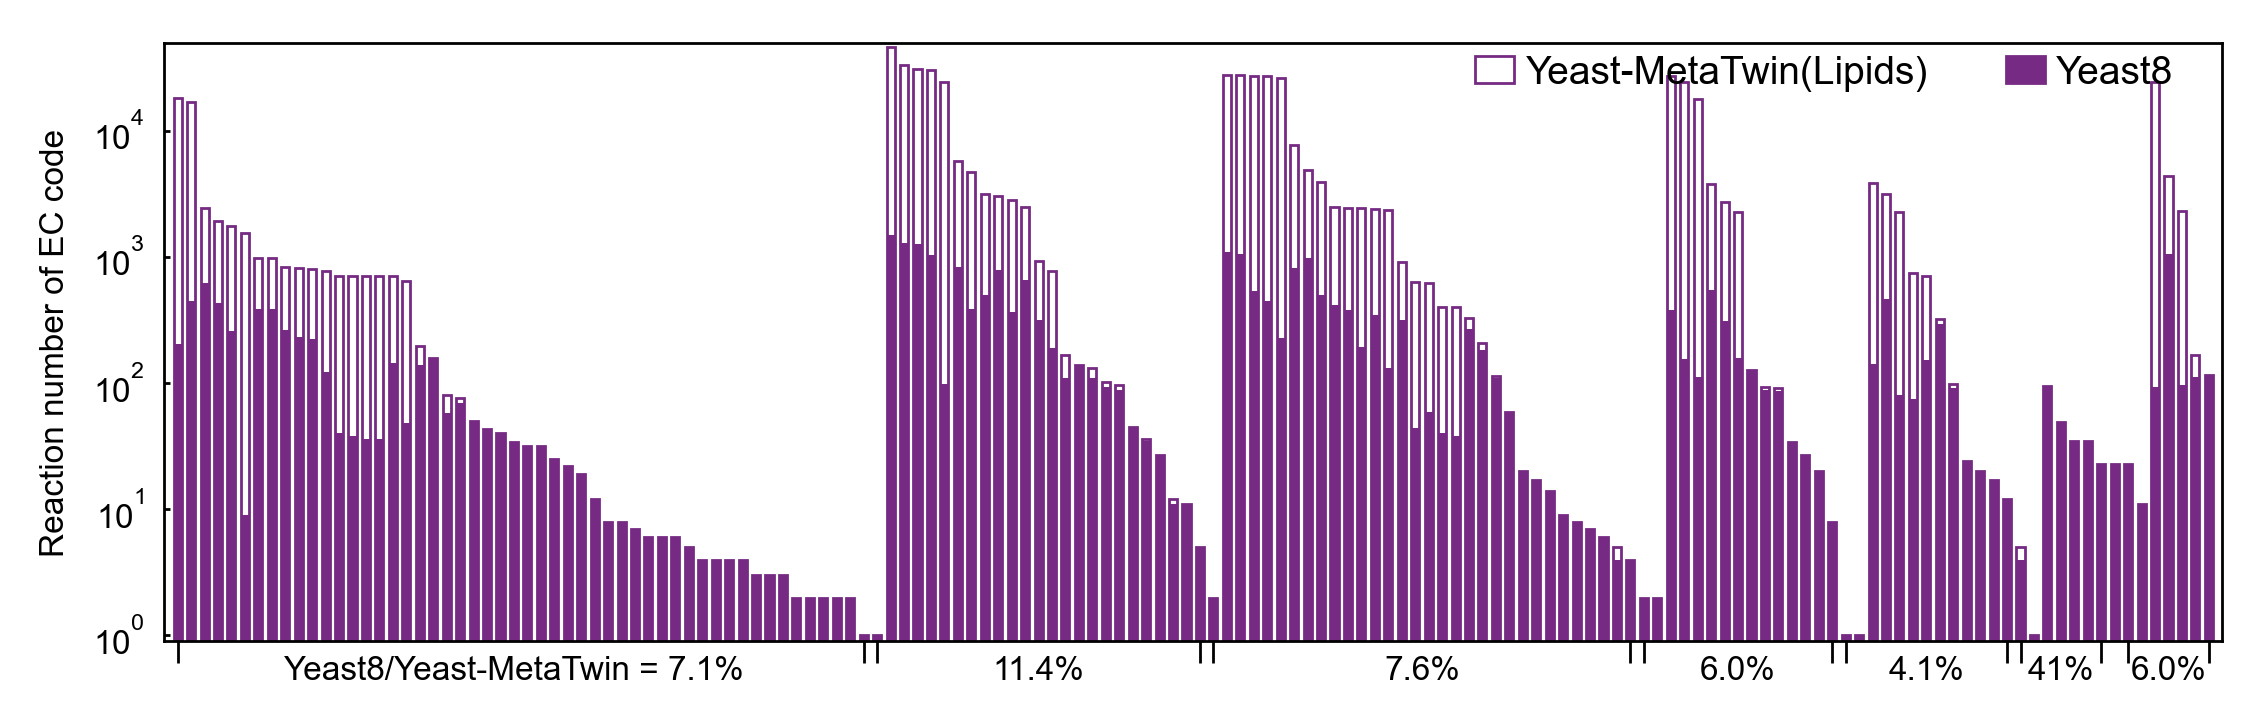

In [12]:

# Set general parameters
plt.figure(figsize=(5.8, 1.8), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'

# Set axis style
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# Draw stacked bar chart
bar_width = 0.6
index = np.arange(len(yeast8U_yeast8_ec_frequency_df['EC']))

# colors = ['#d53e4f', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd']
colors = ['#762a83', '#762a83', '#762a83', '#762a83', '#762a83', '#762a83', '#762a83']
sections = [(0, 52), (52, 77), (77, 109), (109, 124), (124, 137), (137, 145), (145, 152)]

for i, (start, end) in enumerate(sections):
    plt.bar(index[start:end], yeast8U_yeast8_ec_frequency_df['yeast8U'][start:end], width=bar_width, color='white', edgecolor=colors[i], linewidth=0.5)
    plt.bar(index[start:end], yeast8U_yeast8_ec_frequency_df['yeast8'][start:end], width=bar_width, color=colors[i])

# Set y-axis labels
plt.yticks(fontsize=6)

# Set x-axis tick positions and labels
specific_ticks = [0, 51, 52, 76, 77, 108, 109, 123, 124, 136, 137, 143, 145, 151]
plt.xticks(specific_ticks, [''] * len(specific_ticks))

specific_ticks2 = [25, 64, 92.5, 116, 130, 140, 148]
specific_labels2 = ['Yeast8/Yeast-MetaTwin = 7.1%', '11.4%', '7.6%', '6.0%', '4.1%', '41%', '6.0%']
for tick, label in zip(specific_ticks2, specific_labels2):
    plt.text(tick, 0.7, label, ha='center', va='top', fontsize=6, rotation=0)

# Set axis parameters
plt.tick_params(axis='y', direction='in', width=0.5, which='both', length=1)
plt.tick_params(axis='x', which='both', width=0.5, length=4, pad=1)

plt.xlim(-1, 152)
plt.ylim(0.9, 50000)
plt.yscale('log')
plt.minorticks_off()

plt.ylabel('Reaction number of EC code', fontsize=6)

# Set legend
custom_patch1 = mpatches.Patch(facecolor='white', edgecolor='#762a83', linewidth=0.5, label='Yeast-MetaTwin(Lipids)')
custom_patch2 = mpatches.Patch(facecolor='#762a83', edgecolor='#762a83', linewidth=0.5, label='Yeast8')

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Insert custom legend entries into handles and labels
handles.insert(0, custom_patch1)
handles.insert(1, custom_patch2)

# Create legend
plt.legend(handles=handles, frameon=False, fontsize=7, loc='center left', bbox_to_anchor=(0.62, 0.95), ncol=2, labelspacing=0.5, handletextpad=0.3, handlelength=1)

plt.tight_layout()
plt.savefig(figs13_path, dpi=400, bbox_inches='tight')                         
plt.show()

In [13]:
#extract the first digit of EC number
yeast8U_yeast8_ec_frequency_df['EC_first_digit'] = yeast8U_yeast8_ec_frequency_df['EC'].str.split('.').str[0]
# group by the first digit of EC number and sum
yeast8U_yeast8_ec_frequency_df_first = yeast8U_yeast8_ec_frequency_df.groupby('EC_first_digit')[['yeast8', 'yeast8U']].sum().reset_index()
yeast8U_yeast8_ec_frequency_df_first['ratio'] = yeast8U_yeast8_ec_frequency_df_first.apply(
    lambda row: row['yeast8U'] / row['yeast8'] if row['yeast8'] != 0 else 0,
    axis=1
)
yeast8U_yeast8_ec_frequency_df_first

,EC_first_digit,yeast8,yeast8U,ratio
0,1,4757,53246,11.193189
1,2,9917,190037,19.162751
2,3,8362,169573,20.279000
3,4,2061,79006,38.333819
4,5,1376,11322,8.228198
5,6,294,294,1.000000
6,7,1476,31290,21.199187


In [14]:
yeast8U_yeast8_ec_frequency_df_first['ratio/1'] = yeast8U_yeast8_ec_frequency_df_first['yeast8']/yeast8U_yeast8_ec_frequency_df_first['yeast8U']
yeast8U_yeast8_ec_frequency_df_first

,EC_first_digit,yeast8,yeast8U,ratio,ratio/1
0,1,4757,53246,11.193189,0.089340
1,2,9917,190037,19.162751,0.052185
2,3,8362,169573,20.279000,0.049312
3,4,2061,79006,38.333819,0.026087
4,5,1376,11322,8.228198,0.121533
5,6,294,294,1.000000,1.000000
6,7,1476,31290,21.199187,0.047172
